In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
HouseDF = pd.read_csv('countrydataset.csv')

In [32]:
HouseDF.head()

,Income of XYZ in Average form,House Age in Average Form,Average Number of Rooms in Each House,Average Number of Bedrooms in Each House,Total Strength of Area,Price of House in that Area,Address
0,905854.922,2.14,4.54,1.95,15472,1286299.583,17621 Spenser Road
1,666900.506,11.26,3.47,3.47,14824,4983018.465,13 Pierstorff Crossing
2,246211.379,10.21,6.98,1.51,15012,3155492.426,19477 Daystar Terrace
3,881606.926,12.23,5.43,1.07,19729,2060470.311,16445 Portage Lane
4,349527.537,9.59,5.21,2.83,14313,9237328.161,9 Bluestem Alley


In [33]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Income of XYZ in Average form             1000 non-null   float64
 1   House Age in Average Form                 1000 non-null   float64
 2   Average Number of Rooms in Each House     1000 non-null   float64
 3   Average Number of Bedrooms in Each House  1000 non-null   float64
 4   Total Strength of Area                    1000 non-null   int64  
 5   Price of House in that Area               1000 non-null   float64
 6   Address                                   1000 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 54.8+ KB


In [34]:
HouseDF.describe()

,Income of XYZ in Average form,House Age in Average Form,Average Number of Rooms in Each House,Average Number of Bedrooms in Each House,Total Strength of Area,Price of House in that Area
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,555536.907272,7.937690,6.588510,2.989320,16040.961000,5.547277e+06
std,263680.984650,4.016204,2.027355,1.102934,2254.669787,2.642669e+06
min,100294.902000,1.040000,3.000000,1.000000,12002.000000,1.001632e+06
25%,326704.949250,4.555000,4.875000,2.047500,14091.750000,3.143072e+06
50%,554580.417000,7.890000,6.645000,3.060000,16070.500000,5.456180e+06
75%,788611.731000,11.310000,8.420000,3.870000,17924.500000,7.837209e+06
max,998318.561000,14.990000,9.980000,5.000000,19990.000000,9.984343e+06


In [35]:
HouseDF.columns

Index(['Income of XYZ in Average form', 'House Age in Average Form',
       'Average Number of Rooms in Each House',
       'Average Number of Bedrooms in Each House', 'Total Strength of Area',
       'Price of House in that Area', 'Address'],
      dtype='object')

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


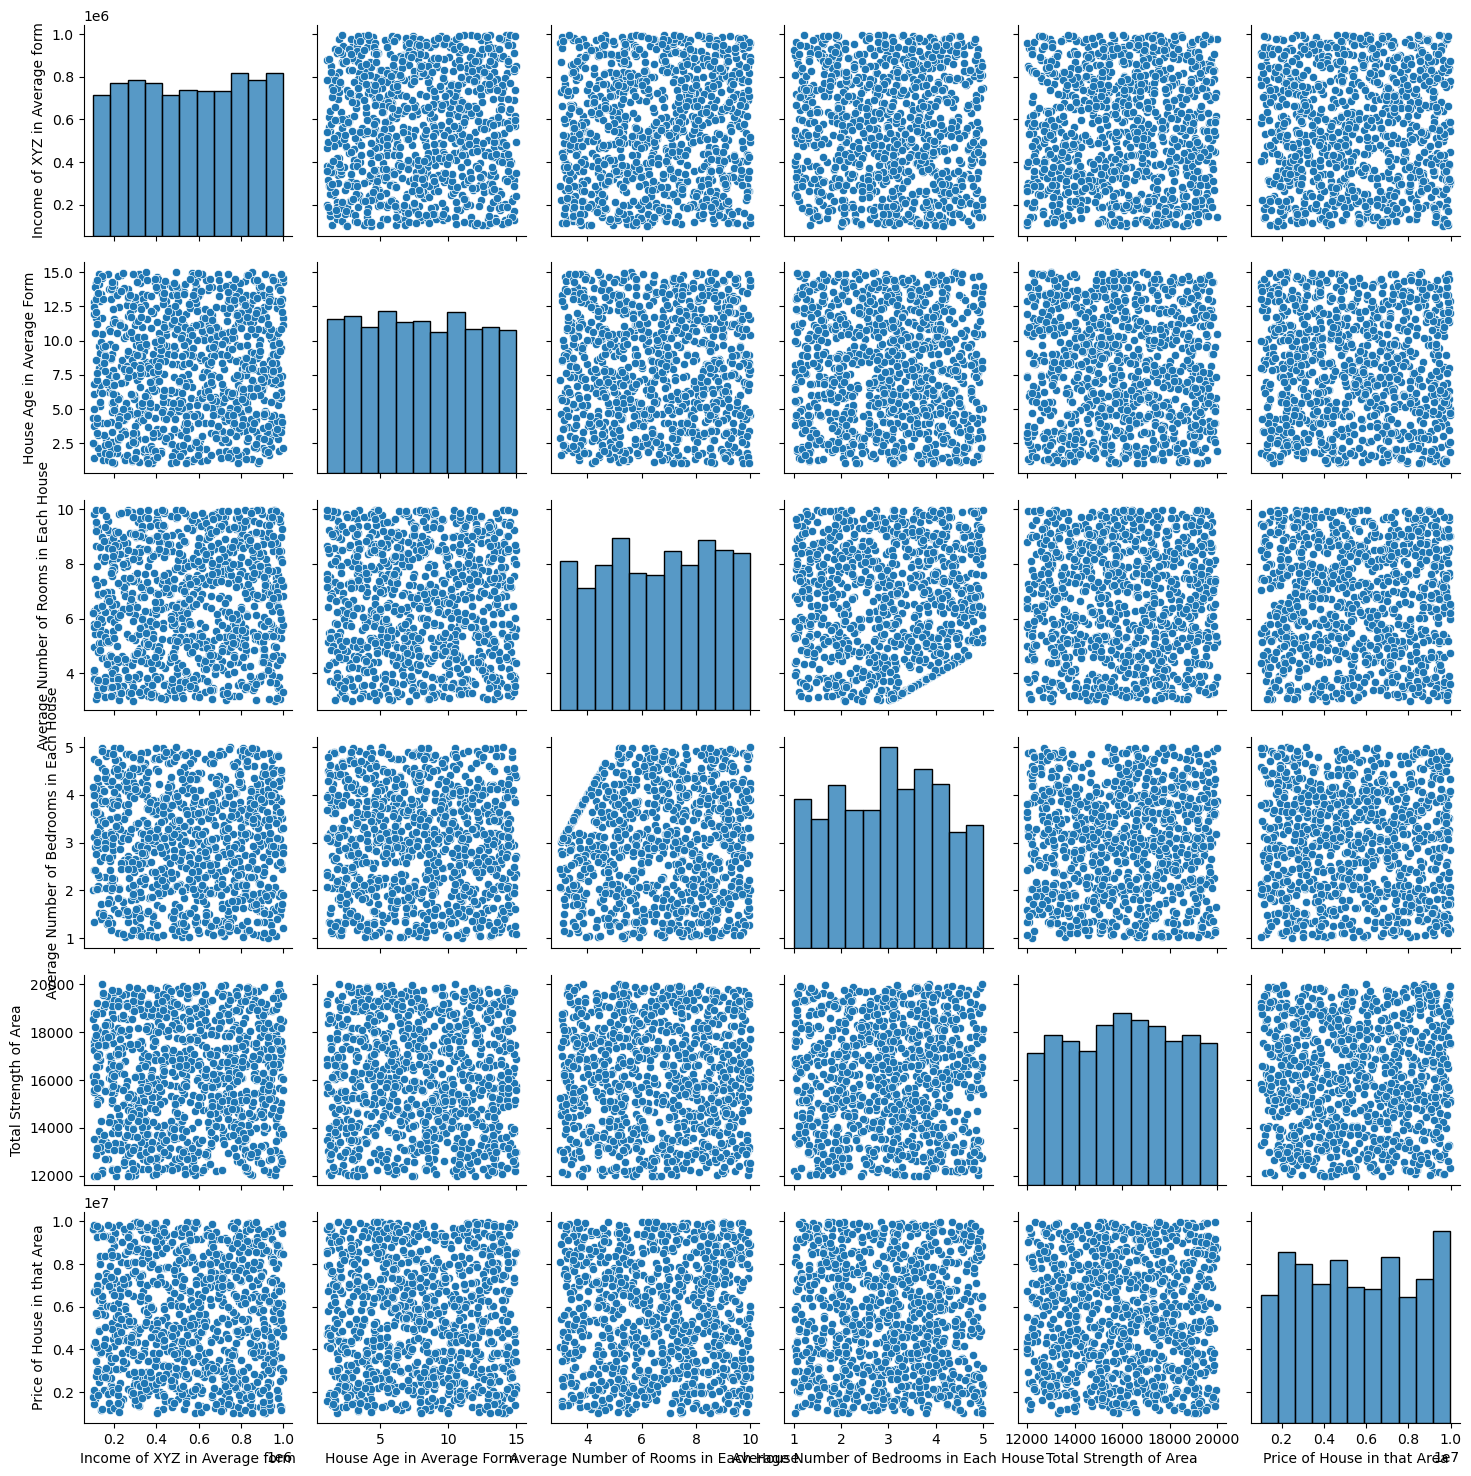

In [36]:
sns.pairplot(HouseDF)

<Axes: xlabel='Price of House in that Area', ylabel='Count'>

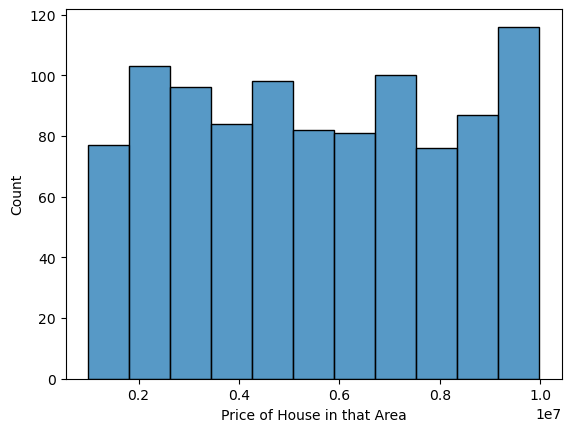

In [37]:
sns.histplot(HouseDF['Price of House in that Area'])

<Axes: >

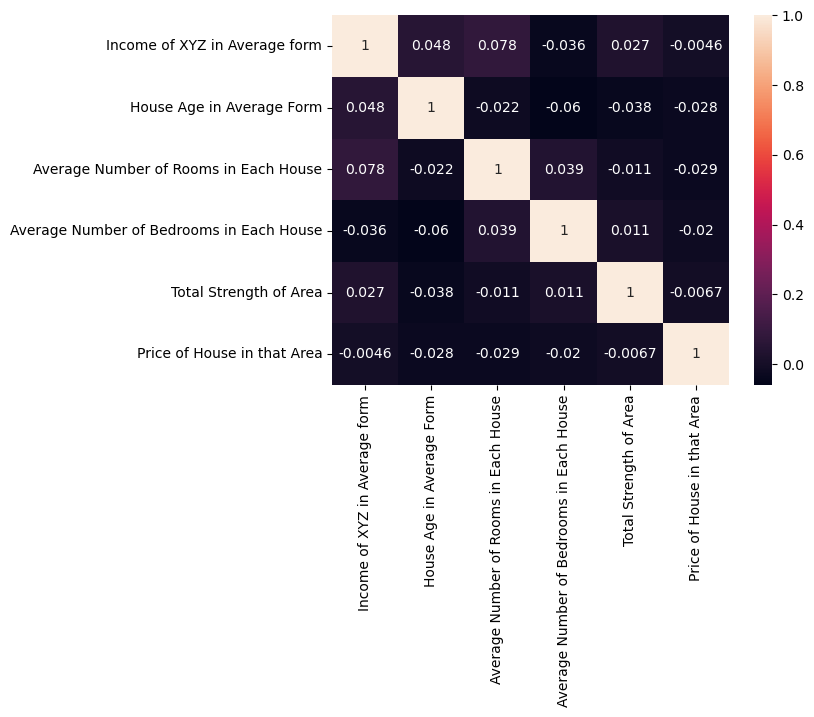

In [38]:
numeric_columns = HouseDF.select_dtypes(include=['number'])
sns.heatmap(numeric_columns.corr(), annot=True)


In [39]:
X = HouseDF[['Income of XYZ in Average form', 'House Age in Average Form', 'Average Number of Rooms in Each House',
               'Average Number of Bedrooms in Each House', 'Total Strength of Area']]

y = HouseDF['Price of House in that Area']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lm = LinearRegression()

In [44]:
lm.fit(X_train,y_train)

LinearRegression()

In [45]:
print(lm.intercept_)

6212536.991533645


In [46]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Income of XYZ in Average form,0.210478
House Age in Average Form,-23809.484812
Average Number of Rooms in Each House,-14736.181062
Average Number of Bedrooms in Each House,97198.719079
Total Strength of Area,-49.397807


In [47]:
predictions = lm.predict(X_test)

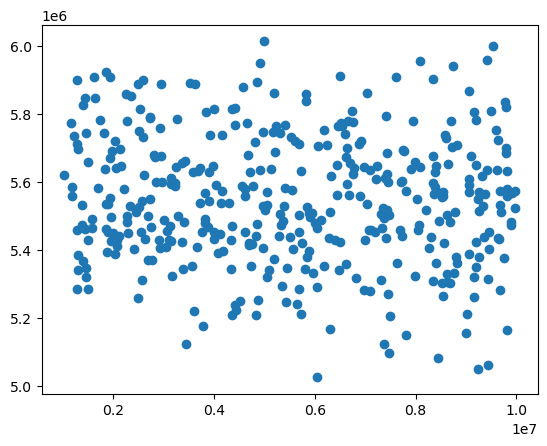

In [48]:
plt.scatter(y_test,predictions)

In the above scatter plot, we see data is in line shape, which means our model has done good predictions.

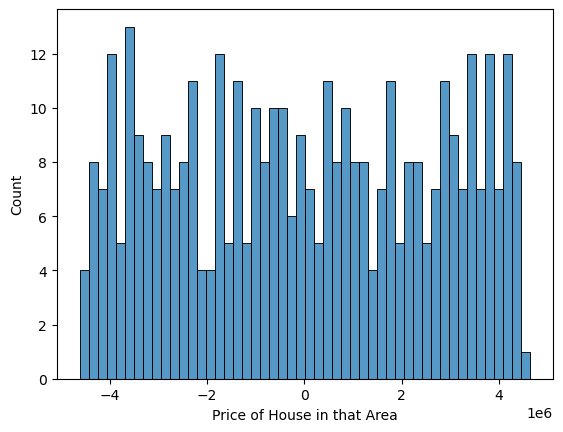

In [49]:
sns.histplot((y_test-predictions),bins=50);

In [50]:
from sklearn import metrics

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2304515.364513391
MSE: 7066887099496.003
RMSE: 2658361.7322508995


In [52]:
results_df = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': predictions})
results_df.to_csv('predict.csv', index=False)
